In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# import the data and add in the 'Match Outcome' feature
data = pd.read_csv("england-premier-league-matches-2018-to-2019-stats (1).csv")

data['Match Outcome'] = np.where(data['home_team_goal_count'] > data['away_team_goal_count'], "Home Win", "Away Win")
data['Match Outcome'] = np.where(data['home_team_goal_count'] == data['away_team_goal_count'], "Draw", data['Match Outcome'])

data = data.drop(['timestamp', 'date_GMT', 'status', 'home_team_name','away_team_name', 'referee', 'stadium_name', 'home_team_goal_timings', 'away_team_goal_timings', 'home_team_goal_count', 'away_team_goal_count', 'home_team_goal_count_half_time', 'away_team_goal_count_half_time'], axis=1)
X = data.drop('Match Outcome', axis=1)
y = data['Match Outcome']



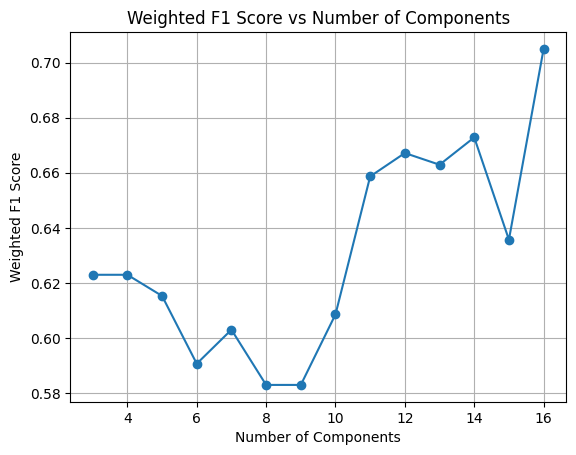

In [34]:
f1_scores = []
num_components = range(3, 17)

# Iterate over different numbers of components
for n in num_components:
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=n)  # Number of principal components to retain (adjust as needed)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)


    model = LogisticRegression()

    # Train the model on the transformed principal components
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    # Calculate weighted F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

# Plot the F1 scores
plt.plot(num_components, f1_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score vs Number of Components')
plt.grid(True)
plt.show()